# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


###  Import Statements


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [3]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f'There are {df_data.shape[0]} rows and {df_data.shape[1]} columns')

There are 2000 rows and 96 columns


In [5]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [6]:
df_data.isna().values.any()

# There are missing values in the dataframe

True

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [7]:
df_data.isna().sum().sort_values(ascending=False).head(20)

# There are 16 columns with missing values
# Not necessary to drop the rows with missing values.

PRMONF      1073
PRMONM       879
PRFSTYAE     790
PRFSTYAN     790
PRFSTYUN     790
PRFSTYPE     790
PRMSTYUN     533
PRMSTYPE     533
PRMSTYAN     533
PRMSTYAE     533
SFR          399
POVRAT97     373
HHINC97      370
SMR           82
JOBS          47
AGEMBTH       44
ID             0
SM             0
REG97NE        0
SF             0
dtype: int64

In [8]:
df_data.duplicated().values.sum()

# There are 513 duplicated rows

513

In [9]:
df_data.drop_duplicates(inplace=True)

In [10]:
df_data.shape

# Shape of dataframe after dropping duplicated rows

(1487, 96)

## Descriptive Statistics

In [11]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 0 to 1995
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   AGEMBTH   1453 non-null   float64
 9   HHINC97   1205 non-null   float64
 10  POVRAT97  1203 non-null   float64
 11  HHBMBF    1487 non-null   int64  
 12  HHBMOF    1487 non-null   int64  
 13  HHOMBF    1487 non-null   int64  
 14  HHBMONLY  1487 non-null   int64  
 15  HHBFONLY  1487 non-null   int64  
 16  HHOTHER   1487 non-null   int64  
 17  MSA97NO   1487 non-null   int64  
 18  MSA97NCC  1487 non-null   int64  
 19  MSA97CC   1487 non-null   int64  
 20  MSA97NK   1487 non-null   int64  
 

In [13]:
df_data.corr().sort_values(by='EARNINGS', ascending=False).head(15)

# So apparently there's not a feature with a high correlation with the Earnings

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
EARNINGS,-0.14,1.00,0.28,-0.02,-0.12,0.12,-0.08,0.08,0.08,0.24,...,0.03,0.07,-0.07,-0.05,0.07,-0.03,-0.04,0.05,0.04,NaN
S,-0.10,0.28,1.00,-0.58,0.16,-0.16,-0.04,0.04,0.26,0.33,...,0.09,0.07,0.01,-0.09,0.02,-0.06,-0.05,0.07,0.00,NaN
ASVABMK,-0.11,0.27,0.54,-0.23,0.09,-0.09,-0.02,0.02,0.21,0.28,...,0.06,0.10,-0.01,-0.07,-0.01,-0.08,-0.03,0.06,-0.01,NaN
ASVABAR,-0.08,0.26,0.46,-0.20,-0.01,0.01,0.01,-0.01,0.20,0.27,...,0.06,0.06,0.05,-0.11,0.03,-0.07,-0.05,0.08,0.00,NaN
ASVABC4,-0.09,0.25,0.55,-0.25,0.07,-0.07,0.01,-0.01,0.24,0.30,...,0.07,0.09,0.03,-0.10,0.01,-0.08,-0.04,0.07,-0.00,NaN
ASVABC,-0.08,0.24,0.52,-0.24,0.04,-0.04,0.01,-0.01,0.24,0.29,...,0.07,0.07,0.04,-0.11,0.02,-0.08,-0.04,0.07,0.00,NaN
ASVABMV,-0.09,0.24,0.56,-0.28,0.06,-0.06,0.03,-0.03,0.25,0.28,...,0.06,0.09,0.02,-0.09,0.00,-0.07,-0.04,0.07,-0.00,NaN
HHINC97,-0.20,0.24,0.33,-0.11,-0.01,0.01,-0.04,0.04,0.32,1.00,...,0.03,-0.01,0.03,-0.05,0.04,-0.07,-0.03,0.06,-0.01,NaN
POVRAT97,-0.18,0.20,0.31,-0.10,-0.01,0.01,-0.06,0.06,0.34,0.96,...,0.03,-0.02,0.02,-0.04,0.05,-0.07,-0.02,0.06,-0.01,NaN
EDUCPROF,-0.07,0.20,0.21,-0.14,0.00,-0.00,-0.02,0.02,0.03,0.11,...,0.01,0.01,0.00,-0.02,0.01,-0.00,-0.02,0.02,-0.01,NaN


Understand relationship of variables with the earnings

In [14]:
# Check for Gender

print(f'Male Count: {df_data.FEMALE.value_counts()[0]}, Female Count: {df_data.FEMALE.value_counts()[1]} \n')

print(f'Female average earnings: {df_data[df_data.FEMALE == 1].EARNINGS.mean()}')
print(f'Male average earnings: {df_data[df_data.MALE == 1].EARNINGS.mean()}')

Male Count: 761, Female Count: 726 

Female average earnings: 17.342741046831954
Male average earnings: 20.203876478318


In [15]:
# Check for Ethnicity

ethnic_count = df_data.groupby(by=['ETHBLACK', 'ETHHISP', 'ETHWHITE'], as_index=False).agg(Count=('ID', 'count'))
print(ethnic_count, '\n')

ethnic_mean = df_data.groupby(by=['ETHBLACK', 'ETHHISP', 'ETHWHITE'], as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(ethnic_mean)

   ETHBLACK  ETHHISP  ETHWHITE  Count
0         0        0         1   1138
1         0        1         0    169
2         1        0         0    180 

   ETHBLACK  ETHHISP  ETHWHITE  Average_Earnings
0         0        0         1             19.42
1         0        1         0             18.29
2         1        0         0             15.43


In [16]:
# Check for Age in 2011

age_counts = df_data.AGE.value_counts()
print(age_counts, '\n')

age_avg_earnings = df_data.groupby(by='AGE', as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
age_avg_earnings

AGE
28    315
29    312
30    304
27    300
31    256
Name: count, dtype: int64 



,AGE,Average_Earnings
0,27,18.25
1,28,17.08
2,29,18.79
3,30,20.20
4,31,19.95


In [17]:
# Check for Years of Schooling

years_of_school_earnings = df_data.groupby(by='S', as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
years_of_school_earnings

# The higher the number of schooling years, the higher the earnings

,S,Average_Earnings
0,6,8.50
1,8,12.91
2,9,12.22
3,10,14.61
4,11,12.33
5,12,16.34
6,13,15.62
7,14,17.49
8,15,17.45
9,16,21.59


In [18]:
# Check for Highest Educational qualification
education_list = ['EDUCPROF','EDUCPHD','EDUCMAST','EDUCBA','EDUCAA','EDUCHSD','EDUCGED','EDUCDO'] 
education_count = df_data.groupby(by=education_list,
                                  as_index=False).agg(Count=('ID', 'count'))
education_count

,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,Count
0,0,0,0,0,0,0,0,1,57
1,0,0,0,0,0,0,1,0,110
2,0,0,0,0,0,1,0,0,586
3,0,0,0,0,1,0,0,0,135
4,0,0,0,1,0,0,0,0,454
5,0,0,1,0,0,0,0,0,119
6,0,1,0,0,0,0,0,0,4
7,1,0,0,0,0,0,0,0,22


In [19]:
# Check for Highest Educational qualification and Relationship with Earnings

education_earnings = df_data.groupby(by=education_list,
                                  as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
education_earnings

# Highest earnings for a professional degree while the lowest earnings for a high school dropout

,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,Average_Earnings
0,0,0,0,0,0,0,0,1,13.55
1,0,0,0,0,0,0,1,0,12.60
2,0,0,0,0,0,1,0,0,16.65
3,0,0,0,0,1,0,0,0,17.91
4,0,0,0,1,0,0,0,0,21.52
5,0,0,1,0,0,0,0,0,24.41
6,0,1,0,0,0,0,0,0,29.41
7,1,0,0,0,0,0,0,0,38.01


In [20]:
# Check for Marital Status

marital_status_count = df_data.groupby(by=['SINGLE', 'MARRIED', 'COHABIT', 'OTHSING'], as_index=False).agg(Count=('ID', 'count'))
print(marital_status_count, '\n')

marital_status_earnings =  df_data.groupby(by=['SINGLE', 'MARRIED', 'COHABIT', 'OTHSING'], as_index=False).\
    agg(Average_Earnings=('EARNINGS', 'mean'))
print(marital_status_earnings)

   SINGLE  MARRIED  COHABIT  OTHSING  Count
0       0        0        0        1     98
1       0        0        1        0    281
2       0        1        0        0    620
3       1        0        0        0    488 

   SINGLE  MARRIED  COHABIT  OTHSING  Average_Earnings
0       0        0        0        1             14.96
1       0        0        1        0             16.45
2       0        1        0        0             20.49
3       1        0        0        0             18.80


In [21]:
# Check for Score in the ASVAB Battery
from sklearn.preprocessing import StandardScaler

# The ASVABMV column has to be standardized to match the other columns' scores
asvab_col_names = ['ASVABWK','ASVABPC','ASVABNO','ASVABMV','ASVABCS','ASVABC4','ASVABC','ASVABAR','VERBAL']
asvab_scores = df_data[asvab_col_names].copy()

scaler = StandardScaler()
scaler.fit(asvab_scores[['ASVABMV']])
asvab_scores['ASVABMV'] = scaler.transform(asvab_scores[['ASVABMV']])
df_data['ASVABMV'] = asvab_scores['ASVABMV']

asvab_scores.describe()

,ASVABWK,ASVABPC,ASVABNO,ASVABMV,ASVABCS,ASVABC4,ASVABC,ASVABAR,VERBAL
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,0.16,0.16,0.15,-0.00,0.15,0.20,0.21,0.22,0.17
std,0.94,0.95,0.99,1.00,0.97,0.94,0.93,0.93,0.94
min,-3.11,-2.61,-3.87,-2.01,-4.87,-2.91,-3.05,-3.00,-2.89
25%,-0.45,-0.44,-0.51,-0.82,-0.53,-0.37,-0.33,-0.30,-0.44
50%,0.25,0.26,0.18,0.11,0.17,0.29,0.29,0.29,0.28
75%,0.81,0.85,0.82,0.86,0.82,0.87,0.86,0.80,0.84
max,2.88,2.41,3.82,1.57,3.15,2.54,2.64,2.63,2.70


In [22]:
# Check for Faith

faith_count = df_data.groupby(by=['FAITHN','FAITHC','FAITHJ','FAITHP','FAITHO','FAITHM'], as_index=False).agg(Count=('ID', 'count'))
print(faith_count, '\n')

faith_earnings =  df_data.groupby(by=['FAITHN','FAITHC','FAITHJ','FAITHP','FAITHO','FAITHM'], as_index=False).\
    agg(Average_Earnings=('EARNINGS', 'mean'))
print(faith_earnings)

   FAITHN  FAITHC  FAITHJ  FAITHP  FAITHO  FAITHM  Count
0       0       0       0       0       0       1     93
1       0       0       0       0       1       0     35
2       0       0       0       1       0       0    843
3       0       0       1       0       0       0     17
4       0       1       0       0       0       0    466
5       1       0       0       0       0       0     33 

   FAITHN  FAITHC  FAITHJ  FAITHP  FAITHO  FAITHM  Average_Earnings
0       0       0       0       0       0       1             19.41
1       0       0       0       0       1       0             20.64
2       0       0       0       1       0       0             18.25
3       0       0       1       0       0       0             24.01
4       0       1       0       0       0       0             19.29
5       1       0       0       0       0       0             19.92


In [23]:
# Check for Household Location - Metropolitan Statistics

metropolitan_col_names = ['MSA97NO','MSA97NCC','MSA97CC','MSA97NK']

metropolitan_count = df_data.groupby(by=metropolitan_col_names, as_index=False).agg(Count=('ID', 'count'))
print(metropolitan_count, '\n')

metropolitan_avg_earnings = df_data.groupby(by=metropolitan_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(metropolitan_avg_earnings)

   MSA97NO  MSA97NCC  MSA97CC  MSA97NK  Count
0        0         0        0        1     13
1        0         0        1        0    390
2        0         1        0        0    793
3        1         0        0        0    291 

   MSA97NO  MSA97NCC  MSA97CC  MSA97NK  Average_Earnings
0        0         0        0        1             16.60
1        0         0        1        0             17.89
2        0         1        0        0             20.44
3        1         0        0        0             15.69


In [24]:
# Check for Household Location - Rural or Urban

rural_urban_col_names = ['RS97RURL','RS97URBN','RS97UNKN']

rural_urban_count = df_data.groupby(by=rural_urban_col_names, as_index=False).agg(Count=('ID', 'count'))
print(rural_urban_count, '\n')

rural_urban_earnings = df_data.groupby(by=rural_urban_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(rural_urban_earnings)

   RS97RURL  RS97URBN  RS97UNKN  Count
0         0         1         0   1061
1         1         0         0    426 

   RS97RURL  RS97URBN  RS97UNKN  Average_Earnings
0         0         1         0             19.24
1         1         0         0             17.73


In [25]:
# Check for Household Location - Census Region

census_region_col_names = ['REG97NE','REG97NC','REG97W','REG97S']

census_region_count = df_data.groupby(by=census_region_col_names, as_index=False).agg(Count=('ID', 'count'))
print(census_region_count, '\n')

census_region_avg_earnings = df_data.groupby(by=census_region_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(census_region_avg_earnings)

   REG97NE  REG97NC  REG97W  REG97S  Count
0        0        0       0       1    461
1        0        0       1       0    313
2        0        1       0       0    461
3        1        0       0       0    252 

   REG97NE  REG97NC  REG97W  REG97S  Average_Earnings
0        0        0       0       1             17.84
1        0        0       1       0             19.42
2        0        1       0       0             18.21
3        1        0       0       0             20.90


In [26]:
# Check for Household structure

hold_structure_col_names = ['HHBMBF','HHBMOF','HHOMBF','HHBMONLY','HHBFONLY','HHOTHER']

hold_structure_count = df_data.groupby(by=hold_structure_col_names, as_index=False).agg(Count=('ID', 'count'))
print(hold_structure_count, '\n')

hold_structure_avg_earnings = df_data.groupby(by=hold_structure_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(hold_structure_avg_earnings)

   HHBMBF  HHBMOF  HHOMBF  HHBMONLY  HHBFONLY  HHOTHER  Count
0       0       0       0         0         0        1     22
1       0       0       0         0         1        0     38
2       0       0       0         1         0        0    266
3       0       0       1         0         0        0     31
4       0       1       0         0         0        0    128
5       1       0       0         0         0        0   1002 

   HHBMBF  HHBMOF  HHOMBF  HHBMONLY  HHBFONLY  HHOTHER  Average_Earnings
0       0       0       0         0         0        1             15.97
1       0       0       0         0         1        0             15.00
2       0       0       0         1         0        0             17.06
3       0       0       1         0         0        0             16.46
4       0       1       0         0         0        0             16.31
5       1       0       0         0         0        0             19.87


In [27]:
# Check for Household Income

household_income = df_data[['HHINC97', 'POVRAT97']].copy()
household_income.describe()

,HHINC97,POVRAT97
count,"1,205.00","1,203.00"
mean,"58,310.67",362.26
std,"43,868.05",294.23
min,0.00,0.00
25%,"32,000.00",190.50
50%,"50,500.00",302.00
75%,"72,000.00",441.00
max,"246,474.00","1,627.00"


In [28]:
# Check for Parental Monitoring

p_monitor = df_data[['PRMONM', 'PRMONF']].copy()
print(p_monitor.info(), '\n')

p_monitor_count = df_data.groupby(by=['PRMONM', 'PRMONF'], as_index=False).agg(Count=('ID', 'count'))
print(p_monitor_count.sort_values(by='Count', ascending=False), '\n')

p_monitor_avg_earnings = df_data.groupby(by=['PRMONM', 'PRMONF'], as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
p_monitor_avg_earnings.sort_values(by='Average_Earnings', ascending=False)


<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRMONM  851 non-null    float64
 1   PRMONF  698 non-null    float64
dtypes: float64(2)
memory usage: 34.9 KB
None 

     PRMONM  PRMONF  Count
94    11.00   11.00     22
106   12.00   10.00     19
108   12.00   12.00     18
66     9.00    8.00     17
119   13.00   12.00     15
..      ...     ...    ...
8      2.00    5.00      1
95    11.00   12.00      1
122   14.00    0.00      1
123   14.00    3.00      1
0      0.00    0.00      1

[149 rows x 3 columns] 



,PRMONM,PRMONF,Average_Earnings
21,4.00,5.00,60.10
48,7.00,11.00,56.25
6,2.00,1.00,41.96
110,12.00,14.00,38.46
95,11.00,12.00,36.15
...,...,...,...
12,3.00,4.00,7.50
135,15.00,9.00,7.25
41,7.00,2.00,6.74
3,1.00,3.00,5.00


In [29]:
# Check for Parental Style 

parental_style_col_names = ['PRMSTYUN','PRMSTYPE','PRMSTYAN','PRMSTYAE','PRFSTYUN','PRFSTYPE','PRFSTYAN','PRFSTYAE']

fatherly_style_count = df_data.groupby(by=parental_style_col_names[:4], as_index=False).agg(Count=('ID', 'count'))
print(fatherly_style_count, '\n')

fatherly_style_avg_earnings = df_data.groupby(by=parental_style_col_names[:4], as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(fatherly_style_avg_earnings, '\n')

motherly_style_count = df_data.groupby(by=parental_style_col_names[4:], as_index=False).agg(Count=('ID', 'count'))
print(motherly_style_count, '\n')

motherly_style_avg_earnings = df_data.groupby(by=parental_style_col_names[4:], as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(motherly_style_avg_earnings)

   PRMSTYUN  PRMSTYPE  PRMSTYAN  PRMSTYAE  Count
0      0.00      0.00      0.00      1.00    352
1      0.00      0.00      1.00      0.00    146
2      0.00      1.00      0.00      0.00    437
3      1.00      0.00      0.00      0.00    165 

   PRMSTYUN  PRMSTYPE  PRMSTYAN  PRMSTYAE  Average_Earnings
0      0.00      0.00      0.00      1.00             18.91
1      0.00      0.00      1.00      0.00             17.48
2      0.00      1.00      0.00      0.00             19.10
3      1.00      0.00      0.00      0.00             18.12 

   PRFSTYUN  PRFSTYPE  PRFSTYAN  PRFSTYAE  Count
0      0.00      0.00      0.00      1.00    291
1      0.00      0.00      1.00      0.00    174
2      0.00      1.00      0.00      0.00    285
3      1.00      0.00      0.00      0.00    154 

   PRFSTYUN  PRFSTYPE  PRFSTYAN  PRFSTYAE  Average_Earnings
0      0.00      0.00      0.00      1.00             19.81
1      0.00      0.00      1.00      0.00             17.21
2      0.00      1.00   

In [30]:
# Check for work related variables(EARNINGS AND HOURS)

print(f'Average Hourly Earnings: {df_data.EARNINGS.mean():.4}')

df_data[['EARNINGS', 'HOURS']].describe()

Average Hourly Earnings: 18.81


,EARNINGS,HOURS
count,"1,487.00","1,487.00"
mean,18.81,39.10
std,12.00,10.90
min,2.00,10.00
25%,11.41,37.00
50%,15.75,40.00
75%,22.60,40.00
max,132.89,80.00


In [31]:
# Check for work related variables(TENURE, JOBS, EXP)

df_data[['TENURE', 'EXP', 'JOBS']].describe()

,TENURE,EXP,JOBS
count,"1,487.00","1,487.00","1,449.00"
mean,3.56,6.70,5.90
std,2.63,2.86,3.27
min,0.06,0.00,1.00
25%,1.21,4.65,3.00
50%,3.10,6.63,5.00
75%,5.31,8.71,8.00
max,11.77,14.73,24.00


In [32]:
# Check for work related variables(COLLBARG)
collbarg_count = df_data.groupby('COLLBARG', as_index=False).agg(Count=('ID', 'count'))
print(collbarg_count, '\n')

collbarg_avg_earnings = df_data.groupby('COLLBARG', as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(collbarg_avg_earnings)

   COLLBARG  Count
0         0   1312
1         1    175 

   COLLBARG  Average_Earnings
0         0             18.26
1         1             22.88


In [33]:
# Check for category of employment
cat_col_names = ['CATGOV','CATPRI','CATSE','CATNPO','CATMIS']

cat_count = df_data.groupby(by=cat_col_names, as_index=False).agg(Count=('ID', 'count'))
print(cat_count, '\n')

cat_avg_earnings = df_data.groupby(by=cat_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(cat_avg_earnings)

   CATGOV  CATPRI  CATSE  CATNPO  CATMIS  Count
0       0       0      0       0       1     92
1       0       0      0       1       0    113
2       0       0      1       0       1      8
3       0       0      1       1       0      4
4       0       1      0       0       0   1017
5       0       1      1       0       0     83
6       1       0      0       0       0    166
7       1       0      1       0       0      4 

   CATGOV  CATPRI  CATSE  CATNPO  CATMIS  Average_Earnings
0       0       0      0       0       1             16.93
1       0       0      0       1       0             19.17
2       0       0      1       0       1             18.43
3       0       0      1       1       0             11.67
4       0       1      0       0       0             18.07
5       0       1      1       0       0             26.49
6       1       0      0       0       0             20.19
7       1       0      1       0       0             31.18


In [34]:
# Check for Living in 2011(Metropolitan statistics)
living_metro_col_names = ['MSA11NO','MSA11NCC','MSA11CC','MSA11NK','MSA11NIC']

living_metro_count = df_data.groupby(by=living_metro_col_names, as_index=False).agg(Count=('ID', 'count'))
print(living_metro_count, '\n')

living_metro_avg_earnings = df_data.groupby(by=living_metro_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(living_metro_avg_earnings)

   MSA11NO  MSA11NCC  MSA11CC  MSA11NK  MSA11NIC  Count
0        0         0        0        1         0      3
1        0         0        1        0         0    615
2        0         1        0        0         0    801
3        1         0        0        0         0     68 

   MSA11NO  MSA11NCC  MSA11CC  MSA11NK  MSA11NIC  Average_Earnings
0        0         0        0        1         0             28.75
1        0         0        1        0         0             19.56
2        0         1        0        0         0             18.35
3        1         0        0        0         0             16.99


In [35]:
# Check for Living in 2011(Rural/Urban)
living_urban_count = df_data.groupby(by='URBAN', as_index=False).agg(Count=('ID', 'count'))
print(living_urban_count, '\n')

living_urban_avg_earnings = df_data.groupby(by='URBAN', as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(living_urban_avg_earnings)

   URBAN  Count
0      0    340
1      1   1141
2      2      6 

   URBAN  Average_Earnings
0      0             18.23
1      1             18.97
2      2             20.47


In [36]:
# Check for Living in 2011(Census Region)
living_region_col_names = ['REGNE','REGNC','REGW','REGS']

living_region_count = df_data.groupby(by=living_region_col_names, as_index=False).agg(Count=('ID', 'count'))
print(living_region_count, '\n')

living_region_avg_earnings = df_data.groupby(by=living_region_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(living_region_avg_earnings)

   REGNE  REGNC  REGW  REGS  Count
0      0      0     0     1    341
1      0      0     1     0    510
2      0      1     0     0    401
3      1      0     0     0    235 

   REGNE  REGNC  REGW  REGS  Average_Earnings
0      0      0     0     1             20.40
1      0      0     1     0             17.99
2      0      1     0     0             17.35
3      1      0     0     0             20.74


## Visualise the Features

Visualize relationship of variables with the earnings

In [37]:
# Check for Gender - Earnings Distribution

df_data['GENDER'] = df_data[['MALE', 'FEMALE']].idxmax(axis=1)

fig = px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='GENDER', title='Distribution of Earnings in 2011 Based on Gender')
fig.show()

In [38]:
# Check for Gender - Count

px.bar(x=df_data['GENDER'].value_counts().index, y=df_data['GENDER'].value_counts().values, title='Gender Count')

In [39]:
# Check for Ethnicity
df_data['ETHNICITY'] = df_data[['ETHBLACK', 'ETHHISP', 'ETHWHITE']].idxmax(axis=1)

px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='ETHNICITY', title='Distribution of Earnings in 2011 Based on Ethnicity')

Text(0.5, 0, 'Years of Schooling')

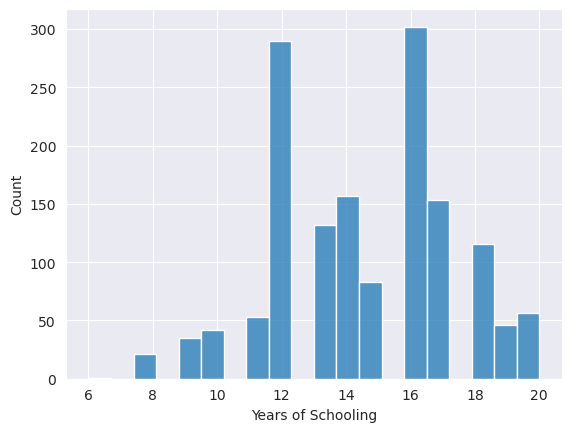

In [40]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Check for Years of Schooling - Count

sns.set_style('darkgrid')
sns.histplot(data=df_data, x='S')
plt.xlabel('Years of Schooling')

In [41]:
# Check for Years of Schooling - Relation to Earnings

fig = px.histogram(data_frame=df_data, x='S', y='EARNINGS')
fig.update_layout(xaxis_title='Years of Schooling')
fig.show()

In [42]:
# Check for Highest Educational qualification - Educational Profession with Earnings

df_data['EDUCATION'] = df_data[education_list].idxmax(axis=1)

px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='EDUCATION')

In [43]:
# Check for Highest Educational qualification - Relationship with Years of Schooling

counts = df_data.groupby(['S', 'EDUCATION']).size().reset_index(name='COUNT')

# Create a stacked bar chart
fig = go.Figure()
for education_level in counts['EDUCATION'].unique():
    filtered_data = counts[counts['EDUCATION'] == education_level]
    fig.add_trace(go.Bar(
        x=filtered_data['S'],
        y=filtered_data['COUNT'],
        name=education_level
    ))

fig.update_layout(
    xaxis=dict(title='Years of Schooling'),
    yaxis=dict(title='Count'),
    title='Stacked Bar Chart of Years of Schooling by Education',
    barmode='stack'
)

fig.show()

In [44]:
# Check for Score in the ASVAB Battery

# Create a box plot using Plotly
fig = go.Figure()

for column in df_data[asvab_col_names]:
    fig.add_trace(go.Box(y=df_data[column], name=column, boxmean=True))

fig.update_layout(
    title='Box Plot of Standardized ASVAB Scores',
    xaxis_title='Features',
    yaxis_title='Standardized Values',
)

fig.show()

In [45]:
# Check for Household Location - Rural or Urban Earnings
df_data['LOCATION'] = df_data[['RS97RURL','RS97URBN']].idxmax(axis=1)

px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='LOCATION', title='Scatter plot of Earnings based on Location')

Text(0.5, 1.0, 'Distribution between Gross household income at 1997 and Hourly Earnings at 2011 interview')

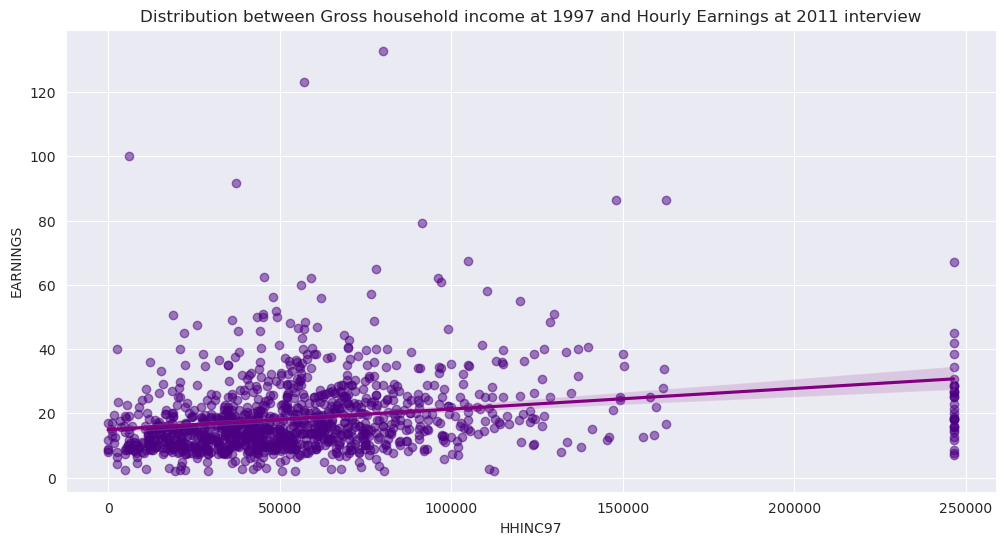

In [46]:
# Check for Household Income

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.regplot(data=df_data, x='HHINC97', y='EARNINGS', scatter_kws={'alpha': 0.5}, 
            color='indigo', marker='o', line_kws={'color': 'purple'})
plt.title('Distribution between Gross household income at 1997 and Hourly Earnings at 2011 interview')

In [47]:
# Check for work related variables(EARNINGS)

px.violin(data_frame=df_data, y='EARNINGS', title='Violin Plot of Earnings')

In [48]:
# Check for work related variables(HOURS)

px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='HOURS', color_continuous_scale=px.colors.cmocean.haline_r,
           title='Scatter Plot of Earnings by ID based on the Usual Number of Hours worked per week')

In [49]:
# Check for category of employment

df_data['CATEGORY'] = df_data[cat_col_names].idxmax(axis=1)

px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='CATEGORY', 
           title='Distribution of Earnings by ID Based on Category of Employment')

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)
y = df_data['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [52]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (1189, 95)
y train shape: (1189,)
X test shape: (298, 95)
y test shape: (298,)


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from math import sqrt

In [54]:
lm = LinearRegression()
lm.fit(X_train[['S']], y_train)

LinearRegression()

In [55]:
# Method one of getting r-squared score
test_years_of_schooling_pred = lm.predict(X_test[['S']])
train_years_of_schooling_pred = lm.predict(X_train[['S']])

print(f'Test data r_2 score: {r2_score(y_pred=test_years_of_schooling_pred, y_true=y_test)}')
print(f'Test data RMSE: {sqrt(mean_squared_error(y_pred=test_years_of_schooling_pred, y_true=y_test))}')


Test data r_2 score: 0.06931387559482405
Test data RMSE: 14.665153357103105


In [56]:
print(f"Training data r_2 score: {lm.score(X_train[['S']], y_train)}")
print(f'Training data RMSE: {sqrt(mean_squared_error(y_pred=train_years_of_schooling_pred, y_true=y_train))}')

Training data r_2 score: 0.08195220331679975
Training data RMSE: 10.574336004654754


In [57]:
# The scores are pretty low

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [58]:
print(f'Coefficient: {lm.coef_[0]:.5}')

# The coefficients have a positive sign meaning the higher the years of schooling, the higher the earnings

Coefficient: 1.1301


In [59]:
print(f'Intercept: {lm.intercept_:.5}')

Intercept: 2.181


In [60]:
s = 1 # Years of schooling
extra_dollars = (lm.coef_[0] * s) + lm.intercept_ #Linear Equation
extra_dollars

3.31110170376673

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [61]:
residuals = y_train - train_years_of_schooling_pred

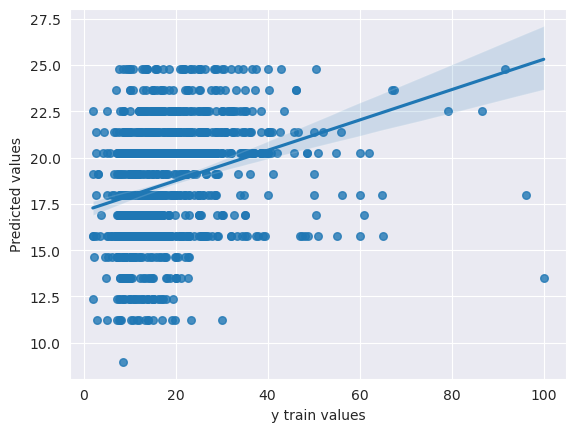

In [62]:
# First plot predictions against true y values

sns.regplot(x=y_train ,y=train_years_of_schooling_pred, scatter_kws={'s': 30})
plt.xlabel('y train values')
plt.ylabel('Predicted values')
plt.show()

# Values are far away from the line meaning predictions aren't good enough. 

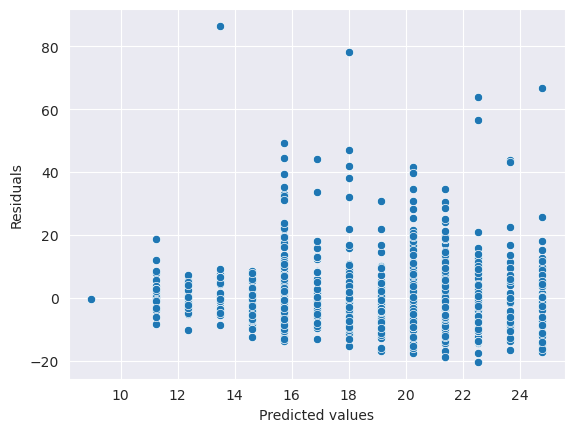

In [63]:
sns.scatterplot(x=train_years_of_schooling_pred, y=residuals)
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.show()

# There is a bias in our model because there's a pattern in our model

In [64]:
print(f"Mean: {residuals.mean():.3}")
print(f"Skew: {residuals.skew():.3}")

Mean: -7.29e-16
Skew: 2.45


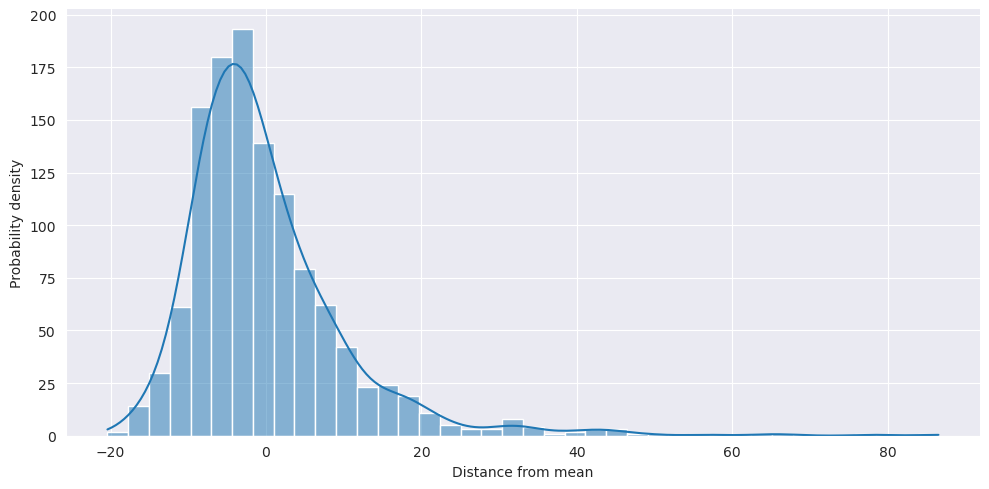

In [65]:
ax=sns.displot(data=residuals, kde=True, aspect=2, bins=40)
ax.set(xlabel='Distance from mean', ylabel='Probability density')
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [66]:
lm.fit(X_train[['S', 'TENURE']], y_train)

LinearRegression()

In [67]:
train_tenure_years_pred = lm.predict(X_train[['S', 'TENURE']])
test_tenure_years_pred = lm.predict(X_test[['S', 'TENURE']])

In [68]:
print(f"Training data r_2 score: {r2_score(y_pred=train_tenure_years_pred, y_true=y_train)}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_tenure_years_pred, y_train))}")

Training data r_2 score: 0.10132100499672347
Training data RMSE: 10.462193674786311


In [69]:
print(f"Test data r_2 score: {r2_score(y_pred=test_tenure_years_pred, y_true=y_test)}")
print(f"Test data RMSE: {sqrt(mean_squared_error(test_tenure_years_pred, y_test))}")

# Scores slightly better than before

Test data r_2 score: 0.08195802506330074
Test data RMSE: 14.565193499021142


### Evaluate the Coefficients of the Model

In [70]:
print(f'Coefficients: {lm.coef_}')

# The coefficients have a positive sign

Coefficients: [1.1069112  0.58781517]


In [71]:
print(f'Intercept: {lm.intercept_:.5}')

Intercept: 0.42883


### Analyse the Estimated Values & Regression Residuals

In [72]:
residuals = y_train - train_tenure_years_pred 

In [73]:
print(f"Mean: {residuals.mean():.3}")
print(f"Skew: {residuals.skew():.3}")

# Mean a bit closer to 0 while skew a bit further away from 0

Mean: 2.13e-15
Skew: 2.57


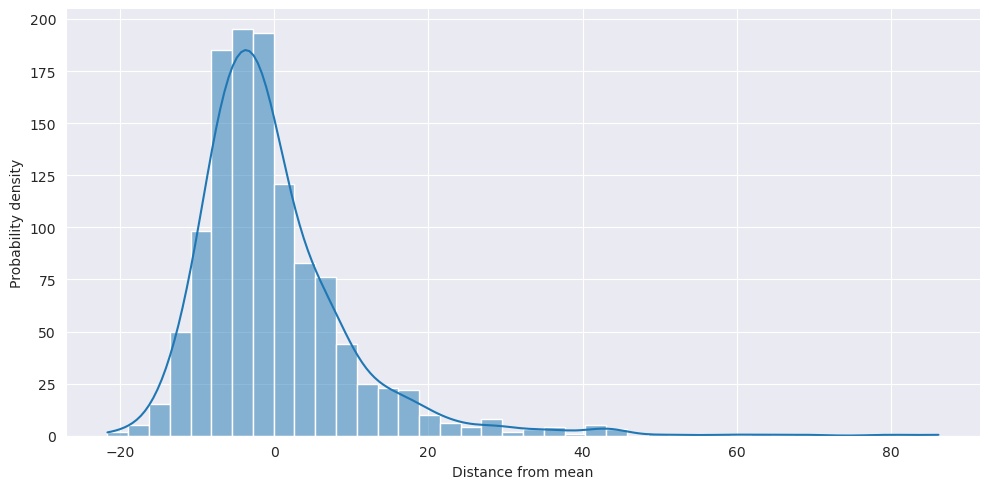

In [74]:
ax=sns.displot(data=residuals, kde=True, aspect=2, bins=40)
ax.set(xlabel='Distance from mean', ylabel='Probability density')
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [75]:
print(f'Dollars earnt: {((12 + 4) * lm.coef_[0]) + (5 * lm.coef_[1]):.5}$')

Dollars earnt: 20.65$


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [76]:
df_data.isna().sum().sort_values(ascending=False).head(20)

PRMONF      789
PRMONM      636
PRFSTYUN    583
PRFSTYAN    583
PRFSTYPE    583
PRFSTYAE    583
PRMSTYAN    387
PRMSTYAE    387
PRMSTYPE    387
PRMSTYUN    387
SFR         290
POVRAT97    284
HHINC97     282
SMR          57
JOBS         38
AGEMBTH      34
REG97S        0
ID            0
REG97NC       0
REG97NE       0
dtype: int64

First Trial: Try removing columns with missing values and use that data

In [77]:
cols_with_missing_values = ['PRMONF','PRMONM','PRFSTYUN','PRFSTYAN','PRFSTYPE','PRFSTYAE','PRMSTYAN','PRMSTYAE',
                            'PRMSTYPE','PRMSTYUN','SFR','POVRAT97','HHINC97','SMR','JOBS','AGEMBTH']

In [78]:
X = df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(cols_with_missing_values, axis=1)
y = df_data['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [79]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (1189, 79)
y train shape: (1189,)
X test shape: (298, 79)
y test shape: (298,)


In [80]:
lm.fit(X_train, y_train)

LinearRegression()

In [81]:
train_pred = lm.predict(X_train)
test_pred = lm.predict(X_test)

In [82]:
print(f'Training data score: {r2_score(y_pred=train_pred, y_true=y_train)}')
print(f'Training data RMSE: {sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))}')

Training data score: 0.28229748033173074
Training data RMSE: 9.349592773452775


In [83]:
print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")

# Scores are better than before

Test data r_2 score: 0.21806492222180962
Test data RMSE: 13.442199523842286


Second Trial: Drop columns with parenting style and monitoring data and drop rows with missing values from the remaining columns

In [84]:
new_cols_with_nan = ['PRMONF','PRMONM','PRFSTYUN','PRFSTYAN','PRFSTYPE','PRFSTYAE','PRMSTYAN','PRMSTYAE','PRMSTYPE','PRMSTYUN']
rows_with_nan = ['SFR','POVRAT97','HHINC97','SMR','JOBS','AGEMBTH']

In [85]:
df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(new_cols_with_nan, axis=1).dropna(subset=rows_with_nan).shape

(900, 85)

In [86]:
X = df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(new_cols_with_nan, axis=1).dropna(subset=rows_with_nan)
y = df_data.dropna(subset=rows_with_nan)['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [87]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (720, 85)
y train shape: (720,)
X test shape: (180, 85)
y test shape: (180,)


In [88]:
lm.fit(X_train, y_train)

LinearRegression()

In [89]:
train_pred = lm.predict(X_train)
test_pred = lm.predict(X_test)

# Worse than before

In [90]:
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))}")

# Training scores are better here

Training data r_2 score: 0.3483922667332553
Training data RMSE: 9.127160559116989


In [91]:
print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")

# Test scores are worse than the first trial

Test data r_2 score: 0.15331292734621327
Test data RMSE: 14.265736734941111


Third trial: Drop some columns with dummy variables

In [92]:
dummies_to_drop = ['FEMALE', 'ETHBLACK', 'EDUCPROF', 'SINGLE', 'FAITHC', 'MSA97NO', 'RS97RURL', 'REG97NE', 'HHBMBF',
                   'CATGOV', 'MSA11NO', 'REGNE']

In [93]:
df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(new_cols_with_nan, axis=1).dropna(subset=rows_with_nan).drop(dummies_to_drop, axis=1).shape

(900, 73)

In [94]:
X = df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(new_cols_with_nan, axis=1).dropna(subset=rows_with_nan).drop(dummies_to_drop, axis=1)
y = df_data.dropna(subset=rows_with_nan).drop(dummies_to_drop, axis=1)['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [95]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (720, 73)
y train shape: (720,)
X test shape: (180, 73)
y test shape: (180,)


In [96]:
lm.fit(X_train, y_train)

LinearRegression()

In [97]:
train_pred = lm.predict(X_train)
test_pred = lm.predict(X_test)

In [98]:
print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))}")

# Training scores are better but test scores are worse than the first trial
# I'd rather not drop them

Test data r_2 score: 0.15331292745666436
Test data RMSE: 14.265736734010622
Training data r_2 score: 0.3483922667350855
Training data RMSE: 9.127160559104171


Fourth Trial: Using the data from the first trial, try using another algorithm like Support Vector Regression 

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [100]:
X = df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(cols_with_missing_values, axis=1)
y = df_data['EARNINGS']

In [101]:
# For normalization, there are two options
# First option: normalize only the columns that aren't yet in scale 

non_asvab_X = X.drop(asvab_col_names, axis=1) 
asvab_X = X[asvab_col_names]
non_asvab_scaled_X = scaler.fit_transform(non_asvab_X)
non_asvab_scaled_X[0]

array([ 0.36227547, -0.9248534 ,  1.05488262, -0.97673327,  0.97673327,
        1.39990301, -1.39990301,  0.69572404, -0.30689885, -0.14591507,
       -0.46674856, -0.16194129, -0.12254413, -0.49326569, -1.06894869,
        1.67714654, -0.0939124 , -0.37110641, -0.3580846 ,  0.5537855 ,
       -0.12254413, -0.05193491, -0.2949378 , -0.66294541, -0.31599378,
        1.23997688, -0.28263723, -0.19965004, -0.69891952,  1.18253418,
       -0.48270245, -0.2656207 , -0.15065195, -1.14411809,  1.48019834,
       -0.10753895, -0.15525683, -0.25829148, -0.50712444,  0.48068492,
       -0.32433279,  0.09499545, -0.44810728, -0.52397392, -0.71463147,
       -0.45171737, -0.67031167,  1.49184333, -0.51634279, -0.6336466 ,
        0.6336466 ,  0.        ,  1.00077679,  0.45949615, -0.35927878,
        0.59314263, -0.29223528, -0.26851081, -0.26706862, -0.36521794,
        0.52616632, -0.43324321, -0.60765528,  1.38408319, -0.5454876 ,
       -0.21890882, -1.08057322,  1.19075026, -0.0449618 ,  0.  

In [102]:
scaled_non_asvab_X_df = pd.DataFrame(non_asvab_scaled_X, columns=non_asvab_X.columns)

# Concatenate the scaled non-ASVAB DataFrame and the ASVAB DataFrame
scaled_X_df = pd.concat([scaled_non_asvab_X_df, asvab_X.reset_index().drop('index', axis=1)], axis=1)
scaled_X_df.head()

,ID,S,EXP,FEMALE,MALE,BYEAR,AGE,HHBMBF,HHBMOF,HHOMBF,...,MSA11NIC,ASVABWK,ASVABPC,ASVABNO,ASVABMV,ASVABCS,ASVABC4,ASVABC,ASVABAR,VERBAL
0,0.36,-0.92,1.05,-0.98,0.98,1.40,-1.40,0.70,-0.31,-0.15,...,0.00,-0.69,-0.31,-0.36,-0.94,-0.72,-0.32,-0.21,0.12,-0.53
1,0.39,0.88,-0.35,-0.98,0.98,-0.05,0.05,0.70,-0.31,-0.15,...,0.00,-0.10,-0.30,-1.21,-0.35,-0.17,-0.14,0.13,0.45,-0.21
2,2.60,-0.20,1.14,-0.98,0.98,-0.77,0.77,-1.44,-0.31,-0.15,...,0.00,0.95,0.06,0.06,0.37,-0.07,0.48,0.51,0.42,0.54
3,2.65,1.25,-1.81,-0.98,0.98,0.68,-0.68,0.70,-0.31,-0.15,...,0.00,-0.06,-0.03,1.68,-0.17,0.32,0.16,0.37,0.71,-0.05
4,-0.77,0.16,-1.32,-0.98,0.98,1.40,-1.40,0.70,-0.31,-0.15,...,0.00,0.33,0.78,0.22,1.20,0.22,1.07,1.15,1.54,0.59


In [103]:
scaled_X_df.shape

(1487, 79)

In [104]:
# Second option: Normalize the entire dataframe
scaled_X_2 = scaler.fit_transform(X)
scaled_X_df_2 = pd.DataFrame(scaled_X_2, columns=X.columns)
scaled_X_df_2.shape

(1487, 79)

In [105]:
scaled_X_df_2.head()

,ID,S,EXP,FEMALE,MALE,BYEAR,AGE,HHBMBF,HHBMOF,HHOMBF,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,0.36,-0.92,1.05,-0.98,0.98,1.40,-1.40,0.70,-0.31,-0.15,...,0.53,-0.43,-0.61,1.38,-0.55,-0.22,-1.08,1.19,-0.04,0.00
1,0.39,0.88,-0.35,-0.98,0.98,-0.05,0.05,0.70,-0.31,-0.15,...,2.87,-0.43,-0.61,1.38,-0.55,-0.22,0.93,-0.84,-0.04,0.00
2,2.60,-0.20,1.14,-0.98,0.98,-0.77,0.77,-1.44,-0.31,-0.15,...,0.53,-0.43,-0.61,-0.72,1.83,-0.22,-1.08,1.19,-0.04,0.00
3,2.65,1.25,-1.81,-0.98,0.98,0.68,-0.68,0.70,-0.31,-0.15,...,0.53,-0.43,1.65,-0.72,-0.55,-0.22,0.93,-0.84,-0.04,0.00
4,-0.77,0.16,-1.32,-0.98,0.98,1.40,-1.40,0.70,-0.31,-0.15,...,0.53,-0.43,-0.61,-0.72,1.83,-0.22,-1.08,1.19,-0.04,0.00


In [106]:
y = y.reset_index().drop('index', axis=1)['EARNINGS'].copy()
y

0      18.50
1      19.23
2      39.05
3      16.80
4      36.06
        ... 
1482    9.00
1483    8.00
1484    8.57
1485    9.33
1486   14.00
Name: EARNINGS, Length: 1487, dtype: float64

In [107]:
# Use dataframe from the first option
X_train, X_test, y_train, y_test = train_test_split(scaled_X_df, y, test_size=0.2, random_state=101)

In [108]:
param_grid = {'C': [10000, 1000, 100 ,10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 
              'gamma': [10, 1, 0.1, 0.01, 0.001]}

In [109]:
svr = SVR()
grid = GridSearchCV(estimator=svr, param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001,
                               0.0001, 1e-05],
                         'gamma': [10, 1, 0.1, 0.01, 0.001]})

In [110]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [111]:
train_pred = grid.predict(X_train)
test_pred = grid.predict(X_test)

In [112]:
print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))}")

# The training scores are better while the test scores aren't much of an improvement.

Test data r_2 score: 0.15952591014926343
Test data RMSE: 13.936289329954317
Training data r_2 score: 0.4334966071359332
Training data RMSE: 8.306569775588242


In [113]:
# Use dataframe from second option 
X_train, X_test, y_train, y_test = train_test_split(scaled_X_df_2, y, test_size=0.2, random_state=101)

In [114]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001,
                               0.0001, 1e-05],
                         'gamma': [10, 1, 0.1, 0.01, 0.001]})

In [115]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [116]:
train_pred = grid.predict(X_train)
test_pred = grid.predict(X_test)

In [117]:
print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))}")

# The second option has a slightly higher score
# Not really much of an improvement but I'll stick with that from here on

Test data r_2 score: 0.15966064703819338
Test data RMSE: 13.935172217867613
Training data r_2 score: 0.4354627650880992
Training data RMSE: 8.292142480073286


Fifth Trial: Use Random Forests Regression

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rf = RandomForestRegressor(n_estimators=500, max_features='sqrt')

In [120]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500)

In [121]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [122]:
print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))}")

# The variance is really high here.
# Really good training scores but terrible test scores

Test data r_2 score: 0.1502405551355751
Test data RMSE: 14.013060257173132
Training data r_2 score: 0.888355289116595
Training data RMSE: 3.6875637459501327


Sixth Trial: Use Linear Regression with Gradient Descent and Normalized data

In [123]:
# Import the library
from sklearn.linear_model import SGDRegressor

In [124]:
sgdr = SGDRegressor(max_iter=100, alpha=0.001)

In [125]:
sgdr.fit(X_train, y_train)

SGDRegressor(alpha=0.001, max_iter=100)

In [126]:
sgdr.n_iter_

34

In [127]:
train_pred = sgdr.predict(X_train)
test_pred = sgdr.predict(X_test)

In [128]:
print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))}")
# Scores vary but play around the same score as the first trial

Test data r_2 score: 0.21166013612490353
Test data RMSE: 13.497139399796058
Training data r_2 score: 0.2736988184628635
Training data RMSE: 9.405433891491946


Seventh Trial: Use Polynomial Regression

In [129]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from statistics import mean

In [130]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(scaled_X_df_2)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=101)
print(X_train.shape, X_test.shape)

(1189, 3239) (298, 3239)


In [131]:
lm_poly = LinearRegression()
lm_poly.fit(X_train, y_train)

train_pred = lm_poly.predict(X_train)
test_pred = lm_poly.predict(X_test)

print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))} \n")

print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")

# There is a really high variance here (overfitting)

Test data RMSE: 31.579143314229626
Training data RMSE: 1.6519645000059753e-13 

Test data r_2 score: -3.315495913878406
Training data r_2 score: 1.0


In [132]:
# Implementing l1 and l2 regularization
# 1: Ridge Regression
cross_val_scores_ridge = []
alpha_ridge = []

for i in range(1, 11):
    ridge = Ridge(alpha=i * 1000)
    ridge.fit(X_train, y_train)
    scores = cross_val_score(ridge, poly_features, y, cv=10)
    avg_cross_val_score = mean(scores)
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha_ridge.append(i * 1000)

for i in range(len(alpha_ridge)):
    print(f'{alpha_ridge[i]}: {cross_val_scores_ridge[i]}')

# We pick the value that is optimal in terms of balancing bias and variance
# 9000 had the highest score 

1000: -0.019670911437222004
2000: 0.0779199860002999
3000: 0.11235367482476985
4000: 0.12856496128285075
5000: 0.13711330406536876
6000: 0.1417923254389694
7000: 0.14429083253458738
8000: 0.1454680521837978
9000: 0.14580331544997127
10000: 0.14558269318656794


In [133]:
ridge_chosen = Ridge(alpha=9000)
ridge_chosen.fit(X_train, y_train)

Ridge(alpha=9000)

In [134]:
train_pred = ridge_chosen.predict(X_train)
test_pred = ridge_chosen.predict(X_test)

print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))} \n")

print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")

Test data RMSE: 13.80939425101089
Training data RMSE: 8.362505970660488 

Test data r_2 score: 0.17476188442588336
Training data r_2 score: 0.42584128410185185


In [135]:
# 2: Lasso Regression
cross_val_scores_lasso = []
alpha_lasso = []

for i in range(1, 11):
    lasso = Lasso(alpha=i * 0.1)
    lasso.fit(X_train, y_train)
    scores = cross_val_score(lasso, poly_features, y, cv=10)
    avg_cross_val_score = mean(scores)
    cross_val_scores_lasso.append(avg_cross_val_score)
    alpha_lasso.append(i * 0.1)

for i in range(len(alpha_lasso)):
    print(f'{alpha_lasso[i]:.2}: {cross_val_scores_lasso[i]}')

# We pick the value that is optimal in terms of balancing bias and variance

0.1: -0.2183389811431991
0.2: 0.02352823585018985
0.3: 0.12516358523023924
0.4: 0.16278825593906066
0.5: 0.1682656451066733
0.6: 0.16560990260729117
0.7: 0.15902947028719583
0.8: 0.14973110129420336
0.9: 0.14213147711447272
1.0: 0.13439000817518654


In [136]:
lasso_chosen = Lasso(alpha=0.5)
lasso_chosen.fit(X_train, y_train)

Lasso(alpha=0.5)

In [137]:
train_pred = lasso_chosen.predict(X_train)
test_pred = lasso_chosen.predict(X_test)

print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))} \n")

print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")

# Choosing the alpha with the highest score brings along some bias with it

Test data RMSE: 13.550954741837968
Training data RMSE: 8.663271486109208 

Test data r_2 score: 0.20536111890500885
Training data r_2 score: 0.3837982477762132


Eighth Trial: Use SelectKBest Algorithm to select the best features

In [138]:
# Use SelectKBest algorithm to select best features to use
from sklearn.feature_selection import SelectKBest, f_regression

In [139]:
select = SelectKBest(score_func=f_regression, k=10)
z = select.fit_transform(scaled_X_df_2, y)
print('After selecting 10 best features: ', z.shape)

After selecting 10 best features:  (1487, 10)


In [140]:
filter = select.get_support()
all_columns = scaled_X_df_2.columns.to_list()
selected_columns = [column for column, include in zip(all_columns, filter) if include]
print(selected_columns)

['S', 'EDUCPROF', 'ASVABAR', 'ASVABPC', 'ASVABMK', 'ASVABNO', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV']


In [141]:
# Now to try polynomial regression with the selected features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(scaled_X_df_2[selected_columns])
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=101)
print(X_train.shape, X_test.shape)

(1189, 65) (298, 65)


In [142]:
lm_poly = LinearRegression()
lm_poly.fit(X_train, y_train)

train_pred = lm_poly.predict(X_train)
test_pred = lm_poly.predict(X_test)

print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))} \n")

print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")

# Not much of an improvement but we can use the selected features for later
# Since polynomial regression doesn't seem to be providing the best results, I'll focus on other algorithms

Test data RMSE: 14.472582488879835
Training data RMSE: 9.846280664283055 

Test data r_2 score: 0.09359542589415515
Training data r_2 score: 0.20401753202450523


Ninth Trial: Use selected features with Random Forest

In [143]:
selected_features = scaled_X_df_2[selected_columns]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=101)
print(X_train.shape, X_test.shape)

(1189, 10) (298, 10)


In [145]:
rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1)

In [146]:
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [147]:
print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))} \n")

print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")

Test data RMSE: 14.519531500007085
Training data RMSE: 4.008467126246032 

Test data r_2 score: 0.0877051402754021
Training data r_2 score: 0.8680784538327238


Tenth Trial: Using RFE with Random Forests

In [148]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor

In [149]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10)
rfe_model = RandomForestRegressor(n_jobs=-1, n_estimators=300, max_features='sqrt')
pipeline = Pipeline(steps=[('s',rfe),('m',rfe_model)])
pipeline

Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeRegressor(),
                     n_features_to_select=10)),
                ('m',
                 RandomForestRegressor(max_features='sqrt', n_estimators=300,
                                       n_jobs=-1))])

In [150]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=101)
n_scores = cross_val_score(pipeline, scaled_X_df_2, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

print(f'Root mean squared error: {sqrt(abs(mean(n_scores))):.5}')

Root mean squared error: 11.26


In [151]:
rfe = RFE(estimator=RandomForestRegressor(n_jobs=-1), n_features_to_select=10)
rfe.fit(scaled_X_df_2, y)

# Even though RandomForestRegressor as the estimator computes way longer, it gives a better score than DecisionTreeRegressor

RFE(estimator=RandomForestRegressor(n_jobs=-1), n_features_to_select=10)

In [152]:
rfe_selected_columns = [column for column, include in zip(all_columns, rfe.support_) if include]
rfe_selected_columns

['ID',
 'S',
 'EXP',
 'ASVABAR',
 'ASVABMK',
 'ASVABNO',
 'ASVABCS',
 'ASVABMV',
 'HOURS',
 'TENURE']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X_df_2[rfe_selected_columns], y, test_size=0.2, random_state=101)
print(X_train.shape, X_test.shape)

(1189, 10) (298, 10)


In [154]:
rfe_model.fit(X_train, y_train)
train_pred = rfe_model.predict(X_train)
test_pred = rfe_model.predict(X_test)

In [155]:
print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))} \n")

print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")

Test data RMSE: 14.148644136320021
Training data RMSE: 3.77657758550495 

Test data r_2 score: 0.1337172466138311
Training data r_2 score: 0.8829002675900165


Eleventh Trial: Use XGBoost

In [156]:
import xgboost as xgb

In [157]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X_df_2, y, test_size=0.2, random_state=101)
print(X_train.shape, X_test.shape)

(1189, 79) (298, 79)


In [158]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [159]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist'}

# To see model performance for each boosting round
evals = [(dtrain_reg, 'train'), (dtest_reg, 'validation')]

In [160]:
n = 300
model = xgb.train(params=params, dtrain=dtrain_reg, num_boost_round=n, evals=evals,
                  verbose_eval=15, early_stopping_rounds=30)

[0]	train-rmse:9.82414	validation-rmse:14.59995
[15]	train-rmse:4.23890	validation-rmse:13.68214
[30]	train-rmse:2.51325	validation-rmse:13.76117
[36]	train-rmse:1.95307	validation-rmse:13.83789


In [161]:
# Cross validation using xgb
results = xgb.cv(params=params, dtrain=dtrain_reg, num_boost_round=n, nfold=5, early_stopping_rounds=30)

In [162]:
results.head(10)
# The model stops when the lowest rmse mean is reached

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,9.63,0.19,10.61,1.00
1,8.59,0.22,10.58,1.02
2,7.70,0.33,10.50,0.98
3,6.93,0.32,10.51,0.96
4,6.45,0.34,10.43,0.96
5,6.01,0.30,10.35,0.94
6,5.60,0.34,10.37,0.93
7,5.24,0.31,10.33,0.91
8,5.04,0.31,10.30,0.88
9,4.79,0.29,10.27,0.90


In [289]:
# Hyperparameter tuning
params_tuned = {'objective': 'reg:squarederror', 'tree_method': 'hist','max_depth':6,
    'subsample': 1, 'eta': 0.5, 'min_child_weight': 1, 'colsample_bytree': 1,
    'gamma': 2, 'reg_alpha': 0.1, 'reg_lambda': 1}

In [290]:
model = xgb.train(params=params_tuned, dtrain=dtrain_reg, num_boost_round=n, evals=evals,
                  verbose_eval=15, early_stopping_rounds=15)

[0]	train-rmse:9.15284	validation-rmse:14.37332


[15]	train-rmse:2.98636	validation-rmse:13.38414
[30]	train-rmse:1.38911	validation-rmse:13.27170
[37]	train-rmse:1.05891	validation-rmse:13.31261


Twelfth Trial: Use Neural Networks

In [291]:
import tensorflow as tf

2023-11-26 14:19:04.572461: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 14:19:05.118512: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 14:19:05.118574: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 14:19:05.121330: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 14:19:05.376258: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 14:19:08.239466: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

In [437]:
norm_l = tf.keras.layers.Normalization(axis=-1)

# Learns mean and variance
norm_l.adapt(scaled_X_df_2)

In [462]:
neural_model = tf.keras.Sequential([
    tf.keras.Input(shape=(79,)),
    norm_l,
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [463]:
neural_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 79)                159       
 tion)                                                           
                                                                 
 dense_51 (Dense)            (None, 12)                960       
                                                                 
 dense_52 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1132 (4.43 KB)
Trainable params: 973 (3.80 KB)
Non-trainable params: 159 (640.00 Byte)
_________________________________________________________________


In [488]:
neural_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error'
)

In [489]:
history = neural_model.fit(
    X_train, y_train, validation_split=0.2, verbose=2, epochs=15
)

Epoch 1/15


30/30 - 2s - loss: 68.2105 - val_loss: 111.2898 - 2s/epoch - 69ms/step
Epoch 2/15
30/30 - 0s - loss: 62.7497 - val_loss: 110.6707 - 232ms/epoch - 8ms/step
Epoch 3/15
30/30 - 0s - loss: 59.2056 - val_loss: 111.2766 - 205ms/epoch - 7ms/step
Epoch 4/15
30/30 - 0s - loss: 57.8196 - val_loss: 113.6305 - 216ms/epoch - 7ms/step
Epoch 5/15
30/30 - 0s - loss: 57.5694 - val_loss: 116.9978 - 352ms/epoch - 12ms/step
Epoch 6/15
30/30 - 0s - loss: 55.3282 - val_loss: 117.7364 - 338ms/epoch - 11ms/step
Epoch 7/15
30/30 - 1s - loss: 55.2469 - val_loss: 115.5068 - 503ms/epoch - 17ms/step
Epoch 8/15
30/30 - 0s - loss: 54.2521 - val_loss: 117.9461 - 230ms/epoch - 8ms/step
Epoch 9/15
30/30 - 0s - loss: 51.8819 - val_loss: 116.4318 - 304ms/epoch - 10ms/step
Epoch 10/15
30/30 - 0s - loss: 51.6680 - val_loss: 120.2319 - 256ms/epoch - 9ms/step
Epoch 11/15
30/30 - 0s - loss: 51.3520 - val_loss: 123.3437 - 196ms/epoch - 7ms/step
Epoch 12/15
30/30 - 0s - loss: 50.7839 - val_loss: 119.2959 - 260ms/epoch - 9ms/ste

In [490]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
10,51.35,123.34,10
11,50.78,119.30,11
12,49.67,125.63,12
13,48.93,126.10,13
14,50.43,122.32,14


In [491]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

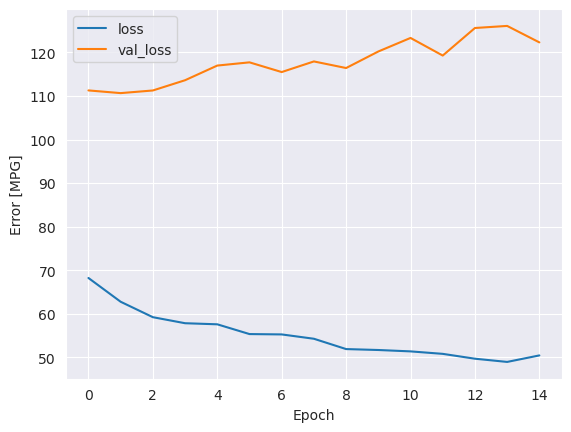

In [492]:
plot_loss(history)

In [493]:
train_pred = neural_model.predict(X_train)
test_pred = neural_model.predict(X_test)

10/10 [==============================] - 0s 4ms/step


In [494]:
print(f"Test data RMSE: {sqrt(mean_squared_error(test_pred, y_test))}")
print(f"Training data RMSE: {sqrt(mean_squared_error(train_pred, y_train))} \n")

print(f"Test data r_2 score: {r2_score(y_pred=test_pred, y_true=y_test)}")
print(f"Training data r_2 score: {r2_score(y_pred=train_pred, y_true=y_train)}")

# Not really the best score

Test data RMSE: 13.973398244891008
Training data RMSE: 7.776038957260628 

Test data r_2 score: 0.15504399890323994
Training data r_2 score: 0.5035495192148588


<h2>Conclusion</h2>

<ul>
    <li>More data is needed to make the models perform better</li>
    <li>XGBoost had the best performance out of all the algorithms implemented</li>
</ul>